In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from IPython.display import display
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

In [40]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
file_path = '/content/drive/MyDrive/Colab_Notebooks/Data/heart_attack_prediction_dataset.csv'
heart_attack = pd.DataFrame(pd.read_csv(file_path))
heart_attack.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Attack Risk,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere
0,67,Male,208,158,0,72,0,0,1,0,...,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere
1,21,Male,389,165,0,98,1,1,1,1,...,1,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere
2,21,Female,324,174,0,72,1,0,0,0,...,9,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere
3,84,Male,383,163,0,73,1,1,1,0,...,9,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere
4,66,Male,318,91,0,93,1,1,1,1,...,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere


In [42]:
unique_sex = heart_attack['Sex'].unique()
print(unique_sex)
unique = heart_attack['Hemisphere'].unique()
print(unique)
unique_country = heart_attack['Country'].unique()
print(unique_country)
unique_diet = heart_attack['Diet'].unique()
print(unique_diet)
unique_continent = heart_attack['Continent'].unique()
print(unique_continent)

['Male' 'Female']
['Southern Hemisphere' 'Northern Hemisphere']
['Argentina' 'Canada' 'France' 'Thailand' 'Germany' 'Japan' 'Brazil'
 'South Africa' 'United States' 'Vietnam' 'China' 'Italy' 'Spain' 'India'
 'Nigeria' 'New Zealand' 'South Korea' 'Australia' 'Colombia'
 'United Kingdom']
['Average' 'Unhealthy' 'Healthy']
['South America' 'North America' 'Europe' 'Asia' 'Africa' 'Australia']


In [43]:
#Defining mapping function to map multiple inputs of the dataset
def gender_map(x):
    return x.map({'M': 1, 'F': 0, 'Male' : 1, "Female" : 0, '1' : 1, '0' : 0})

def hemisphere_map(x):
    return x.map({'Southern Hemisphere' : -1, 'Northern Hemisphere' : 1})

def countries_map(x):
    return x.map({'Argentina' : -1, 'Brazil' : -1, 'China' : -1, 'Colombia' : -1,
    'India' : -1, 'Nigeria' : -1, 'South Africa' : -1, 'South Korea' : -1, 'Thailand' : -1,
    'Vietnam' : -1, 'Australia' : 1, 'Canada' : 1, 'France' : 1, 'Germany' : 1,
    'Italy' : 1, 'Japan' : 1, 'New Zealand' : 1, 'Spain' : 1, 'United Kingdom' : 1,
    'United States' : 1})

def diet_map(x):
    return x.map({'Unhealthy' : -1, 'Average' : 0, 'Healthy' : 1})

def continent_map(x):
    return x.map({'Asia' : 0, 'Africa' : 1, 'Europe' : 2, 'North America' : 3,
    'South America' : 4, 'Australia' : 5})

In [44]:
heart_attack['Sex'] = heart_attack[['Sex']].apply(gender_map)
heart_attack['Hemisphere'] = heart_attack[['Hemisphere']].apply(hemisphere_map)
heart_attack['Country'] = heart_attack[['Country']].apply(countries_map)
heart_attack['Diet'] = heart_attack[['Diet']].apply(diet_map)
heart_attack['Continent'] = heart_attack[['Continent']].apply(continent_map)

In [45]:
unique_sex = heart_attack['Sex'].unique()
print(unique_sex)
unique = heart_attack['Hemisphere'].unique()
print(unique)
unique_country = heart_attack['Country'].unique()
print(unique_country)
unique_diet = heart_attack['Diet'].unique()
print(unique_diet)
unique_continent = heart_attack['Continent'].unique()
print(unique_continent)

# Check for NaN values in columns after fillna operations
columns_with_nulls = heart_attack.columns[heart_attack.isnull().any()].tolist()
print("Columns with NaN values:")
print(columns_with_nulls)

heart_attack.head()

[1 0]
[-1  1]
[-1  1]
[ 0 -1  1]
[4 3 2 0 1 5]
Columns with NaN values:
[]


,Age,Sex,Cholesterol,Blood Pressure,Heart Attack Risk,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere
0,67,1,208,158,0,72,0,0,1,0,...,9,6.615001,261404,31.251233,286,0,6,-1,4,-1
1,21,1,389,165,0,98,1,1,1,1,...,1,4.963459,285768,27.194973,235,1,7,1,3,1
2,21,0,324,174,0,72,1,0,0,0,...,9,9.463426,235282,28.176571,587,4,4,1,2,1
3,84,1,383,163,0,73,1,1,1,0,...,9,7.648981,125640,36.464704,378,3,4,1,3,1
4,66,1,318,91,0,93,1,1,1,1,...,6,1.514821,160555,21.809144,231,1,5,-1,0,1


In [46]:
# Extract features and target
X = heart_attack[['Age', 'Sex', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Diabetes', 'Family History',
                  'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems', 'Medication Use',
                  'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week',
                  'Sleep Hours Per Day', 'Country', 'Continent', 'Hemisphere']].values
y = heart_attack['Heart Attack Risk'].values.reshape(-1, 1)

In [47]:
# Normalize data using Standard Scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# Add intercept term to features
X_train_1 = np.hstack((np.ones((len(X_train), 1)), X_train))
X_test_1 = np.hstack((np.ones((len(X_test), 1)), X_test))

# Initialize linear regression model
linear_model = LinearRegression()

# Fit the model
linear_model.fit(X_train_1, y_train)

# Get predictions
y_linear_pred = linear_model.predict(X_test_1)

# Calculate metrics for linear regression
linear_mse = mean_squared_error(y_test, y_linear_pred)
r2_score = linear_model.score(X_test_1, y_test)


print('Linear Regression Metrics:')
print(f'Mean Squared Error (MSE): {linear_mse:.2f}')
print(f'R-squared (R2): {r2_score:.2f}')

Linear Regression Metrics:
Mean Squared Error (MSE): 0.23
R-squared (R2): -0.00


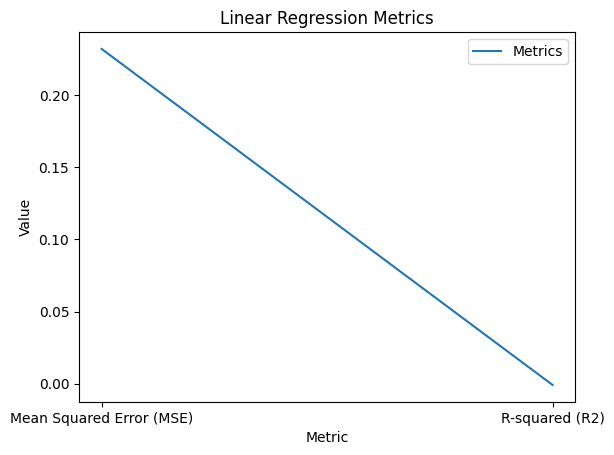

In [48]:
# Plotting data
fig, ax = plt.subplots()
ax.plot(['Mean Squared Error (MSE)', 'R-squared (R2)'], [linear_mse, r2_score])

ax.legend(['Metrics'])
ax.set_title('Linear Regression Metrics')
ax.set_xlabel('Metric')
ax.set_ylabel('Value')

plt.show()

In [49]:
#PCA function
def reduceFeatures(x_t,x_v,K):
  pca = PCA(n_components=K)
  x_tr = pca.fit_transform(x_t)
  x_vr = pca.fit_transform(x_v)
  return x_tr, x_vr

In [50]:
#determine the optimal number of components for logistic regression
accuracy_high = 0.0
f1_high = 0.0
accuracies = []
equals = []
precisions = []
recalls = []
f1 = []
for K in range(1,24):
  x_t, x_v = reduceFeatures(X_train_1,X_test_1,K)
  clf = LogisticRegression() #redefine classifier
  clf.fit(x_t, y_train) #fit classifier
  y_pred = clf.predict(x_v)

  accuracies.append(metrics.accuracy_score(y_test,y_pred))
  precisions.append(metrics.precision_score(y_test,y_pred))
  recalls.append(metrics.recall_score(y_test,y_pred))
  f1.append(metrics.f1_score(y_test,y_pred))
  if(metrics.accuracy_score(y_test,y_pred) > accuracy_high):
    accuracy_high = metrics.accuracy_score(y_test,y_pred)
    K_high_log = K
    f1_high = metrics.f1_score(y_test,y_pred)
    equals.clear()
  if(metrics.accuracy_score(y_test,y_pred) == accuracy_high):
    if(metrics.f1_score(y_test,y_pred) > f1_high): #if accuracies are even, prioritize higher f1 score
      accuracy_high = metrics.accuracy_score(y_test,y_pred)
      K_high_log = K
      f1_high = metrics.f1_score(y_test,y_pred)
      equals.clear()
    else:
      equals.append(K)
print("Most Accurate K value: ", K_high_log)
print("Accuracy:", accuracy_high)
print(equals)
print(accuracies)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use

Most Accurate K value:  1
Accuracy: 0.6354820308043354
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
[0.6354820308043354, 0.6354820308043354, 0.6354820308043354, 0.6354820308043354, 0.6354820308043354, 0.6354820308043354, 0.6354820308043354, 0.6354820308043354, 0.6354820308043354, 0.6354820308043354, 0.6354820308043354, 0.6354820308043354, 0.6354820308043354, 0.6354820308043354, 0.6354820308043354, 0.6354820308043354, 0.6354820308043354, 0.6354820308043354, 0.6354820308043354, 0.6354820308043354, 0.6354820308043354, 0.6354820308043354, 0.6354820308043354]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
# Initialize Logistic Regression model
logreg_model = LogisticRegression(random_state=0)

In [52]:
# Reduce features
X_train_PCA_log, X_test_PCA_log = reduceFeatures(X_train_1, X_test_1, K_high_log)

# Initialize Logistic Regression model
logreg_model = LogisticRegression(random_state=0)

# Fit the model
logreg_model.fit(X_train_PCA_log, y_train)

# Predictions for Logistic Regression
y_pred = logreg_model.predict(X_test_PCA_log)

# Calculate metrics for Logistic Regression
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('\nLogistic Regression Metrics:')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print('\nConfusion Matrix for Logistic Regression:')


Logistic Regression Metrics:
Accuracy: 0.64
Precision: 0.00
Recall: 0.00
F1 Score: 0.00

Confusion Matrix for Logistic Regression:


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


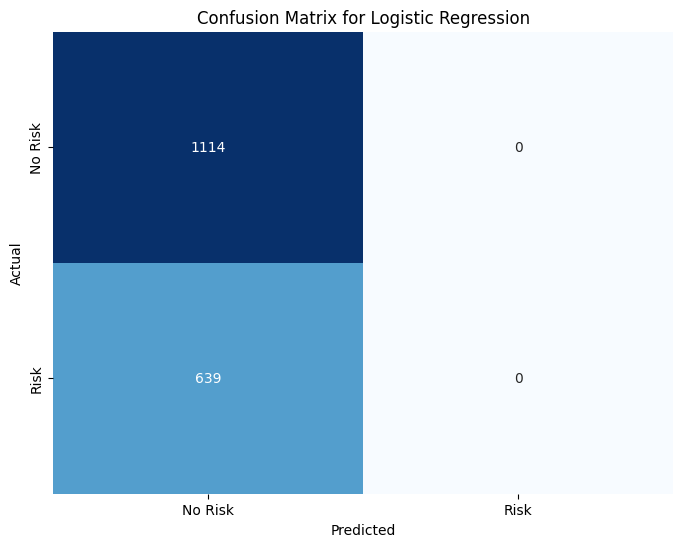

In [53]:
# Confusion matrix for Logistic Regression
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Risk', 'Risk'], yticklabels=['No Risk', 'Risk'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [54]:
#determine the optimal number of components for gaussian
accuracy_high = 0.0
f1_high = 0.0
accuracies = []
equals = []
precisions = []
recalls = []
f1 = []
for K in range(1,24):
  x_t, x_v = reduceFeatures(X_train_1,X_test_1,K)
  clf = GaussianNB() #redefine classifier
  clf.fit(x_t, y_train) #fit classifier
  y_pred = clf.predict(x_v)

  accuracies.append(metrics.accuracy_score(y_test,y_pred))
  precisions.append(metrics.precision_score(y_test,y_pred))
  recalls.append(metrics.recall_score(y_test,y_pred))
  f1.append(metrics.f1_score(y_test,y_pred))
  if(metrics.accuracy_score(y_test,y_pred) > accuracy_high):
    accuracy_high = metrics.accuracy_score(y_test,y_pred)
    K_high_gau = K
    f1_high = metrics.f1_score(y_test,y_pred)
    equals.clear()
  if(metrics.accuracy_score(y_test,y_pred) == accuracy_high):
    if(metrics.f1_score(y_test,y_pred) > f1_high): #if accuracies are even, prioritize higher f1 score
      accuracy_high = metrics.accuracy_score(y_test,y_pred)
      K_high_gau = K
      f1_high = metrics.f1_score(y_test,y_pred)
      equals.clear()
    else:
      equals.append(K)
print("Most Accurate K value: ", K_high_gau)
print("Accuracy:", accuracy_high)
print(equals)
print(accuracies)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use

Most Accurate K value:  1
Accuracy: 0.6354820308043354
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
[0.6354820308043354, 0.6354820308043354, 0.6354820308043354, 0.6354820308043354, 0.6354820308043354, 0.6354820308043354, 0.6354820308043354, 0.6354820308043354, 0.6354820308043354, 0.6354820308043354, 0.6354820308043354, 0.6354820308043354, 0.6354820308043354, 0.6354820308043354, 0.6354820308043354, 0.6354820308043354, 0.6354820308043354, 0.6354820308043354, 0.6354820308043354, 0.6354820308043354, 0.6354820308043354, 0.6354820308043354, 0.6354820308043354]


In [55]:
# Reduce features
X_train_PCA_gau, X_test_PCA_gau = reduceFeatures(X_train_1, X_test_1, K_high_gau)

# Initialize Gaussian Naive Bayes model
nb_model = GaussianNB()

# Fit the model
nb_model.fit(X_train_PCA_gau, y_train)

# Predictions for Gaussian Naive Bayes
y_nb_pred = nb_model.predict(X_test_PCA_gau)

# Calculate metrics for Gaussian Naive Bayes
nb_accuracy = accuracy_score(y_test, y_nb_pred)
nb_precision = precision_score(y_test, y_nb_pred)
nb_recall = recall_score(y_test, y_nb_pred)
nb_f1 = f1_score(y_test, y_nb_pred)

print('\nGaussian Naive Bayes Metrics:')
print(f'Accuracy: {nb_accuracy:.2f}')
print(f'Precision: {nb_precision:.2f}')
print(f'Recall: {nb_recall:.2f}')
print(f'F1 Score: {nb_f1:.2f}')
print('\nConfusion Matrix for Gaussian Naive Bayes:')


Gaussian Naive Bayes Metrics:
Accuracy: 0.64
Precision: 0.00
Recall: 0.00
F1 Score: 0.00

Confusion Matrix for Gaussian Naive Bayes:


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


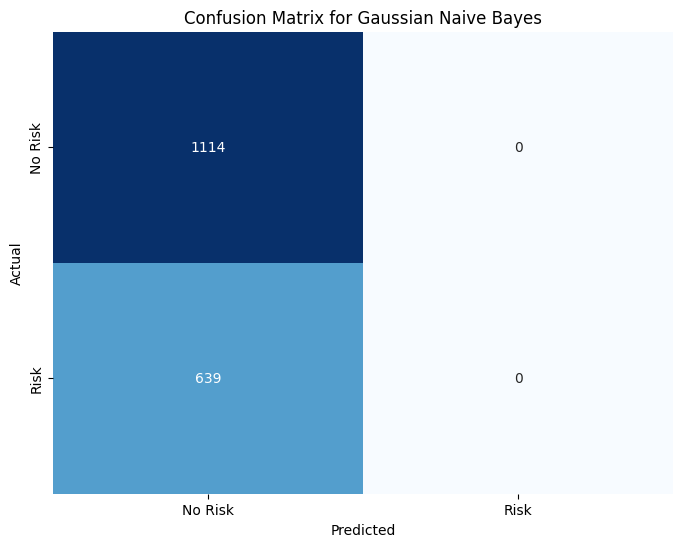

In [56]:

# Confusion matrix for Gaussian Naive Bayes
nb_conf_matrix = confusion_matrix(y_test, y_nb_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(nb_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Risk', 'Risk'], yticklabels=['No Risk', 'Risk'])
plt.title('Confusion Matrix for Gaussian Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()